In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/brianoktavec/MSC550/Assignment_8/BankCustomerChurnPrediction_revised.csv')

In [3]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


# #1

In [5]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

# #2

In [11]:
import statsmodels.api as sm

model=sm.Logit(y_train, sm.add_constant(x_train))
lr = model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.436842
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Sun, 09 Apr 2023   Pseudo R-squ.:                  0.1365
Time:                        20:46:30   Log-Likelihood:                -3494.7
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                4.079e-232
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2910      0.269    -12.219      0.000      -3.819      -2.763
credit_scor

In [9]:
print(lr.pvalues)

const                2.469914e-34
credit_score         2.505135e-02
gender               6.477680e-20
age                 5.476458e-142
tenure               6.917520e-03
balance              7.802217e-22
products_number      1.557314e-01
credit_card          5.709588e-01
active_member        2.230442e-60
estimated_salary     2.899824e-01
dtype: float64


# #3

In [ ]:
# Look at report

# #4

In [12]:
p_pred = lr.predict(sm.add_constant(x_test))
y_pred = round(p_pred)

pt_pred = lr.predict(sm.add_constant(x_train))
yt_pred = round(pt_pred)

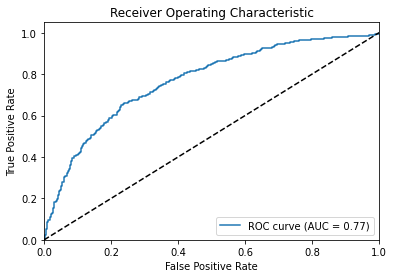

In [14]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, p_pred)

auc_test = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


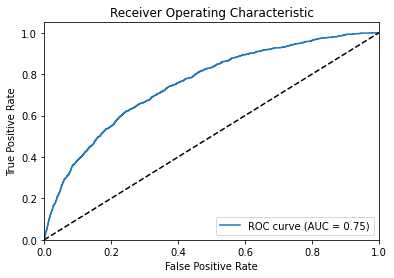

In [15]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pt_pred)

auc_train = auc(fpr_train, tpr_train)

plt.plot(fpr_train, tpr_train, label='ROC curve (AUC = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# #5

In [16]:
from sklearn.metrics import confusion_matrix

y_pred_cutoff = (p_pred >= 0.5).astype(int)
conf_mat = confusion_matrix(y_test, y_pred_cutoff)
print('Confusion Matrix for Testing Sample:')
print(conf_mat)

MR = conf_mat[1,0]/(conf_mat[1,0]+conf_mat[1,1])
TPR = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
FNR = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])

print('MR:', MR)
print('TPR:', TPR)
print('FNR:', FNR)


Confusion Matrix for Testing Sample:
[[1545   50]
 [ 332   73]]
MR: 0.8197530864197531
TPR: 0.9686520376175548
FNR: 0.18024691358024691
